#### The Challenge Your task is to find out meaningful information from the dataset. 
- The dataset can help you find out like: 
- Which hashtags are used mostly quarterly? 
- What words are most often used in the tweets monthly or quarterly? 
- Find Tweets (if any) which share personal information like (email id, mobile number)? 
- Plot a time-series of number of tweets monthly?
- Which period shows the highest growth in tweets.
- Find the most popular bi-grams or tri-grams used in the tweets? 
- You can figure out more such insights about dataset. 

In [201]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
from google.colab import drive

In [203]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
path  =("/content/drive/My Drive/Dataset/")

In [205]:
from google.colab import files
uploaded = files.upload()

Saving tweets_dataset.csv to tweets_dataset (2).csv


In [206]:
data = pd.read_csv(r"tweets_dataset.csv")

In [207]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1186038116517212160,1186038116517212160,1571608497000,2019-10-21,03:24:57,India Standard Time,1120190790406262785,tortoisehq,Tortoise,NaN,Shared micromobility is a global phenomenon. C...,['bounceshare'],['https://twitter.com/vivekanandahr/status/118...,[],0,0,3,[],[],https://twitter.com/TortoiseHQ/status/11860381...,False,https://twitter.com/vivekanandahr/status/11857...,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1120190790406262785', 'username'...",NaN
1,1186002436344823809,1185908839184420870,1571599990000,2019-10-21,01:03:10,India Standard Time,2998467036,pbuhpbuh,Secularians,NaN,It's like a standing joke,"['bengaluru2050', 'vogo_rentals', 'drivezyin',...",[],[],0,0,0,[],[],https://twitter.com/pbuhpbuh/status/1186002436...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2998467036', 'username': 'pbuhpb...",NaN
2,1185995725932384256,1185995725932384256,1571598390000,2019-10-21,00:36:30,India Standard Time,776338794018578432,mikebarman46,𝐇𝐫𝐢𝐝𝐨𝐲 𝐁𝐚𝐫𝐦𝐚𝐧,NaN,First time in Bangalore Alip drive a @bouncesh...,['bounceshare'],['https://www.instagram.com/p/B32d8UllG_X/?igs...,[],0,0,0,[],[],https://twitter.com/mikebarman46/status/118599...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '776338794018578432', 'username':...",NaN
3,1185987970655899648,1185764670323322882,1571596541000,2019-10-21,00:05:41,India Standard Time,932331998,nilesh_sonagra,Nilesh Sonagra,NaN,With helmet you also.consider to put some tiss...,"['vivekanandahr', 'bounceshare']",[],[],0,0,1,[],[],https://twitter.com/nilesh_sonagra/status/1185...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '932331998', 'username': 'nilesh_...",NaN
4,1185965893819367424,1185802096425091072,1571591277000,2019-10-20,22:37:57,India Standard Time,175297154,sandeepmtandon,Sandeep Tandon,NaN,Wow great job.,"['tejeshwi_sharma', 'shaileshlakhani', 'sequoi...",[],[],0,0,1,[],[],https://twitter.com/sandeepmtandon/status/1185...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '175297154', 'username': 'sandeep...",NaN


### Data Preprocessing

In [208]:
data.date.value_counts()

2019-05-15    374
2019-05-16    271
2019-04-25    263
2019-06-05    176
2019-10-09    158
             ... 
2019-02-10      1
2019-03-17      1
2019-04-14      1
2019-04-18      1
2019-02-03      1
Name: date, Length: 293, dtype: int64

In [209]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')

In [210]:
sentences = data['tweet']

In [211]:
sentences[0]

'Shared micromobility is a global phenomenon. Congrats @bounceshare!  https://twitter.com/vivekanandahr/status/1185764670323322882\xa0…'

#### Lets check the distribution of tweets

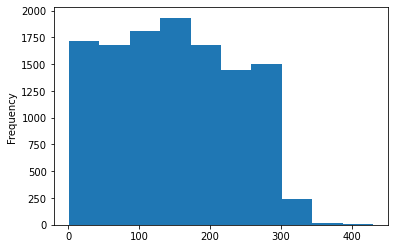

In [212]:
data['tweet'].str.len().plot.hist()

#### Let's first generate a frequency table of all the words present in all the tweets combined.

In [213]:
def gen_freq(text):
    
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    word_freq = pd.Series(word_list).value_counts()

    word_freq[:20]
    
    return word_freq

gen_freq(data.tweet.str)

the                           9408
to                            8761
and                           5461
for                           4804
We                            4559
                              ... 
tixkets,                         1
Raiju,                           1
respite                          1
ಚೇತರಿಸಿ                          1
pic.twitter.com/2SQjy5XOdM       1
Length: 28488, dtype: int64

- We can observe that words like "the", "to", "and" have high frequencies.
- Lets store the frequently occuring words in a list 

In [214]:

all_words = []
import collections
for line in list(data['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
etr = collections.Counter(all_words)

In [215]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenizing tweets 

In [216]:

from string import punctuation

stop_words = list(set(stopwords.words('english')))


def process(tweet):
    #tokenize
    tokenized = word_tokenize(tweet)
    return tokenized

data['tweets'] = data['tweet'].apply(process)

data['tweets'].head()

0    [Shared, micromobility, is, a, global, phenome...
1                    [It, 's, like, a, standing, joke]
2    [First, time, in, Bangalore, Alip, drive, a, @...
3    [With, helmet, you, also.consider, to, put, so...
4                                 [Wow, great, job, .]
Name: tweets, dtype: object

### Analysing the  most common words 

In [217]:
from collections import Counter
new_words = Counter()
for idx in data.index:
    new_words.update(data.loc[idx, "tweets"])

new_words.most_common(10)

[('.', 16740),
 ('@', 12827),
 ('the', 9414),
 ('to', 8783),
 (',', 8035),
 ('and', 5467),
 ('you', 5119),
 ('for', 4835),
 ('#', 4742),
 ('We', 4685)]

In [218]:
# Creating a dataframe for most common words
most_common = pd.DataFrame(new_words.most_common(15),
                             columns=['words', 'count'])
most_common.head()

,words,count
0,.,16740
1,@,12827
2,the,9414
3,to,8783
4,",",8035


#### Lets plot the most common words

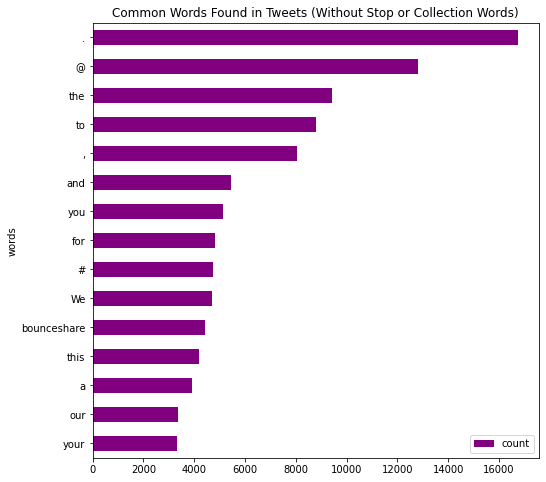

In [219]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

### Data Cleaning


#### Top words after data cleaning

In [220]:

from string import punctuation

stop_words = list(set(stopwords.words('english')))


def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    tweet = re.sub('[0-9]', '', tweet)
    # Remove single space remaining at the front of the tweet.
    #tokenize
    tokenized = word_tokenize(tweet)
    
    #remove stop words:tokenise the words that are not present in stop words
    stopped = [w for w in tokenized if not w in stop_words]
    

    return stopped
# ______________________________________________________________
# clean dataframe's text column
data['clean'] = data['tweet'].apply(processTweet)
# preview some cleaned tweets
data['clean'].head()

0    [shared, micromobility, global, phenomenon, co...
1                               [like, standing, joke]
2    [first, time, bangalore, alip, drive, really, ...
3    [helmet, also, consider, put, tissue, paper, w...
4                                    [wow, great, job]
Name: clean, dtype: object

### Most common words without stopwords

In [221]:
from collections import Counter
words = Counter()
for idx in data.index:
    words.update(data.loc[idx, "clean"])

words.most_common(10)


[('bounce', 2250),
 ('hey', 2152),
 ('get', 1961),
 ('thanks', 1918),
 ('pic', 1862),
 ('twitter', 1833),
 ('com', 1814),
 ('please', 1677),
 ('bike', 1273),
 ('team', 1144)]

In [222]:
most_common = pd.DataFrame(words.most_common(15),
                             columns=['words', 'count'])
most_common.head()

,words,count
0,bounce,2250
1,hey,2152
2,get,1961
3,thanks,1918
4,pic,1862


- The word bounce has the highest frequency after removing the stopwords

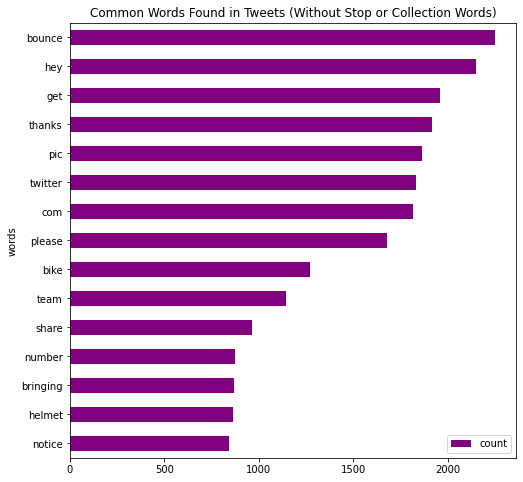

In [223]:

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

- Lets create another column clean_tweet

In [224]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    tweet = re.sub('[0-9]', '', tweet)
  
    

    return tweet
# ______________________________________________________________
# clean dataframe's text column
data['clean_tweet'] = data['tweet'].apply(processTweet)
# preview some cleaned tweets
data['clean_tweet'].head()

0     shared micromobility global phenomenon congrats 
1                                   like standing joke
2    first time bangalore alip drive and really enj...
3    with helmet you also consider put some tissue ...
4                                       wow great job 
Name: clean_tweet, dtype: object

In [225]:
stop = stopwords.words('english')
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

- Lets consider a dataframe that only consists of clean_tweet and date

In [226]:
df = data[['date','clean_tweet']]
df

,date,clean_tweet
0,2019-10-21,shared micromobility global phenomenon congrats
1,2019-10-21,like standing joke
2,2019-10-21,first time bangalore alip drive really enjoyin...
3,2019-10-21,helmet also consider put tissue paper wipes he...
4,2019-10-20,wow great job
...,...,...
12015,2019-01-01,already done
12016,2019-01-01,harish thank contacting please contact number ...
12017,2019-01-01,call please issues kyc person spoke said would...
12018,2019-01-01,dear harish apologies delay actually refund co...


#### What words are most often used in the tweets monthly or quarterly? 

In [227]:
df['date'] = pd.to_datetime(df['date'])
dg = df.groupby(df['date'].dt.strftime('%B'))['clean_tweet'].sum().sort_values()
dg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date
July         absolutely easier said done thoughworst experi...
January      another bad experience today booked keyless bi...
September    bounce pledges join ev initiative viawould lik...
February     get reward money value petrol pour rs fueled r...
June         hey mohanish thanks confidence maintaining bik...
April        hey shradha thanks lot post compliment please ...
August       malleswaramdriving around bangalore many place...
March        need sympathetic reply tweet saying sorry inco...
October      shared micromobility global phenomenon congrat...
May          thank much hemendra taking time leave beautifu...
Name: clean_tweet, dtype: object

In [228]:
df['month'] = pd.DatetimeIndex(df['date']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
df.groupby(["date", "clean_tweet"])["date"].count()

date        clean_tweet                                                                                                                                                            
2019-01-01  already done                                                                                                                                                               1
            call please issues kyc person spoke said would refund bounce wallet okay                                                                                                   1
            dear harish apologies delay actually refund could proceed due kyc error seen paytm gateway please check kyc done paytm account assuring support                            1
            dear harish apologies delay per telephonic discussion one refund checked done next one process one executives call update                                                  1
            dear harish check email mobile number could find refund related info

In [230]:
dc = df.groupby(["month", "clean_tweet"])["month"].size()

dc

month  clean_tweet                                                                                                                                                                            
1                                                                                                                                                                                                 6
       abhilash close end business today apologize delay scaling ensure enough champions serve please thanks                                                                                      1
       absolutely                                                                                                                                                                                 1
       agent called twice explained credited paytm wallet told credited within hrs still credited paytm wallet mob                                                                                1
       alok apologize con

- We can observe that we have grouped the words according to the months.


In [231]:
df

,date,clean_tweet,month
0,2019-10-21,shared micromobility global phenomenon congrats,10
1,2019-10-21,like standing joke,10
2,2019-10-21,first time bangalore alip drive really enjoyin...,10
3,2019-10-21,helmet also consider put tissue paper wipes he...,10
4,2019-10-20,wow great job,10
...,...,...,...
12015,2019-01-01,already done,1
12016,2019-01-01,harish thank contacting please contact number ...,1
12017,2019-01-01,call please issues kyc person spoke said would...,1
12018,2019-01-01,dear harish apologies delay actually refund co...,1


### Most used Adjectives

In [232]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [233]:
all_words_adj = []
all_words = []


stop_words = list(set(stopwords.words('english')))

# Adjectives are good for classifying a review like great, good or bad
#j is advjective, v is verb and r is adverb
#allowed_word_types = ["J","R","V"]

allowed_word_types = ["J"]

for i in sentences:
    
    cleaned = re.sub(r'[^(a-zA-Z)\s]','',i)
    
    #tokenize
    tokenized = word_tokenize(cleaned)
    
    
    stopped = [w for w in tokenized if not w in stop_words]
    
   
    pos = nltk.pos_tag(stopped)
    
    # make a list of all adjectives identified by the allowed word types list above
    
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words_adj.append(w[0].lower())
            
   
    
    

In [234]:
# creating a frequency distribution of each adjectives
all_words_adj = nltk.FreqDist(all_words_adj)
all_words_adj

FreqDist({'global': 7,
          'first': 69,
          'helmet': 140,
          'hygiene': 2,
          'comfortable': 4,
          'great': 224,
          'sincere': 73,
          'checked': 96,
          'payroll': 1,
          'entire': 16,
          'bounceshare': 173,
          'nitingadkari': 3,
          'notice': 44,
          'snap': 30,
          'individual': 96,
          'earliest': 186,
          'much': 202,
          'contact': 30,
          'touch': 70,
          'big': 51,
          'respective': 44,
          'necessary': 245,
          'bike': 86,
          'concerned': 154,
          'upparpetetrfps': 1,
          'dangerous': 13,
          'main': 71,
          'k': 7,
          'daily': 58,
          'public': 185,
          'sure': 165,
          'strict': 67,
          'basic': 19,
          'call': 448,
          'many': 260,
          'possible': 89,
          'impressive': 1,
          'new': 148,
          'telephonic': 102,
          'thread': 2,
        

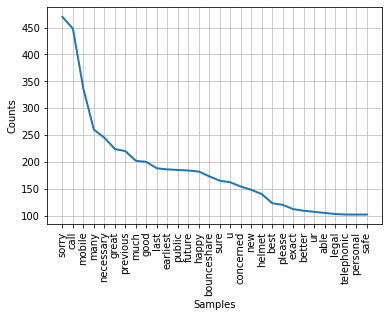

In [235]:

all_words_adj.plot(30,cumulative = False)
plt.show()

In [236]:
word_features = list(all_words_adj.keys())[:8000]
word_features

['global',
 'first',
 'helmet',
 'hygiene',
 'comfortable',
 'great',
 'sincere',
 'checked',
 'payroll',
 'entire',
 'bounceshare',
 'nitingadkari',
 'notice',
 'snap',
 'individual',
 'earliest',
 'much',
 'contact',
 'touch',
 'big',
 'respective',
 'necessary',
 'bike',
 'concerned',
 'upparpetetrfps',
 'dangerous',
 'main',
 'k',
 'daily',
 'public',
 'sure',
 'strict',
 'basic',
 'call',
 'many',
 'possible',
 'impressive',
 'new',
 'telephonic',
 'thread',
 'more',
 'ride',
 'reimagine',
 'nice',
 'app',
 'user',
 'critical',
 'feedback',
 'shaileshlakhani',
 'entite',
 'next',
 'happy',
 'willing',
 'open',
 'future',
 'team',
 'exact',
 'helpful',
 'picked',
 'list',
 'allignment',
 'rear',
 'common',
 'sorry',
 'ideas',
 'unable',
 'start',
 'able',
 'issue',
 'original',
 'cool',
 'impactful',
 'past',
 'good',
 'last',
 'long',
 'alternate',
 'farekm',
 'available',
 'near',
 'mandatory',
 'best',
 'free',
 'website',
 'grateful',
 'top',
 'wonderful',
 'key',
 'tarunsmehta

#### Which hashtags are used mostly quarterly?

In [237]:
data["hashtags"].value_counts()

[]                                                                              9776
['#luruhopping', '#bounceshare']                                                 290
['#bounce']                                                                      230
['#letsbounce', '#bounceshare', '#bouncecontest']                                106
['#passsafetyon']                                                                 83
                                                                                ... 
['#broken', '#bike', '#accidents']                                                 1
['#exclusive', '#scooter']                                                         1
['#bounce', '#vogo']                                                               1
['#shamebounce']                                                                   1
['#stamp2019', '#mumbai', '#lastmile', '#stamp2017', '#bengaluru', '#cifos']       1
Name: hashtags, Length: 732, dtype: int64

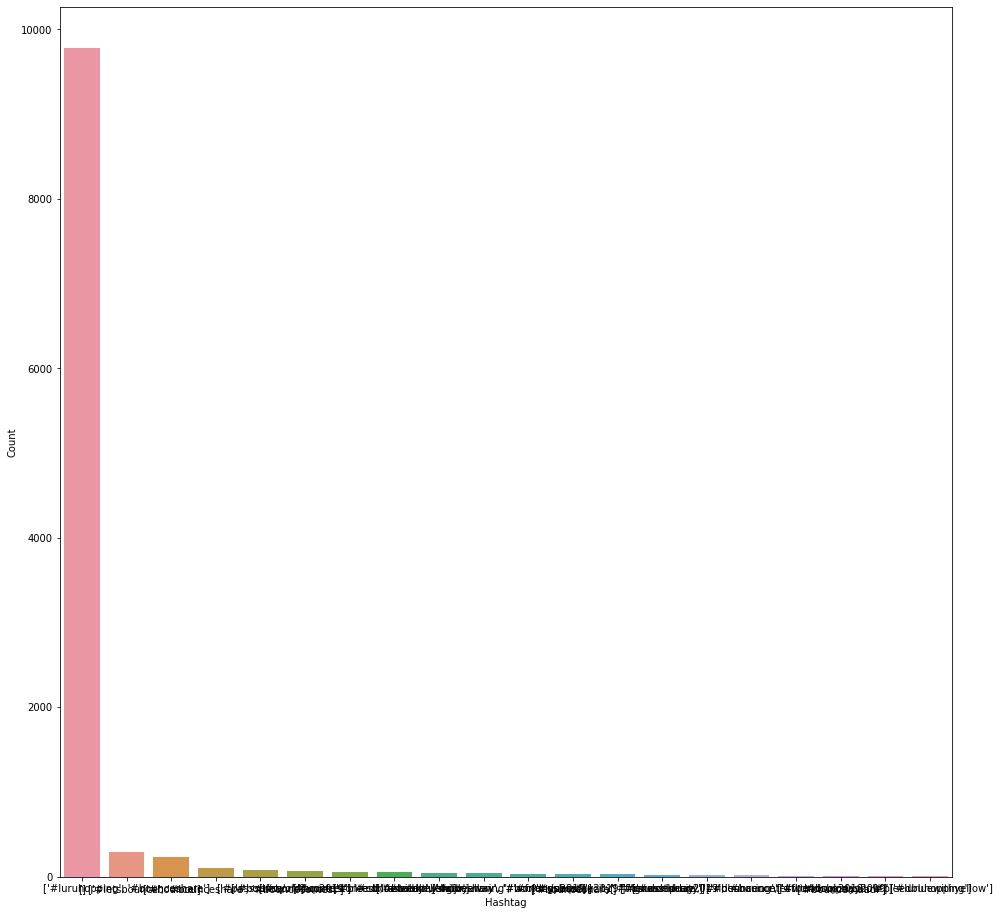

In [238]:

a = nltk.FreqDist(data["hashtags"])
b = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

b = b.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 16))
ax = sns.barplot(data=b, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

In [239]:
d = data.groupby(["date", "hashtags"])["date"].count()
d

date        hashtags                                                                                        
2019-01-01  []                                                                                                  10
2019-01-02  ['#bounce', '#bouncebymetrobikes', '#wickedride']                                                    1
            ['#bouncinginto2019', '#letsbounce', '#moretimeformyself']                                           1
            ['#happybouncing']                                                                                   3
            []                                                                                                  12
                                                                                                                ..
2019-10-20  ['#bouncemaadi']                                                                                     1
            ['#jockermovie']                                                          

- We can observe that #bounce, #bouncebymetrobikes and #wickedride were mostly used in the second month

#### Find Tweets (if any) which share personal information like (email id, mobile number)?

In [240]:
for text in data["tweet"]:
    if re.findall(r"^(\d{10}$)",text):
        print(text)

8866253314
7259816072
9739634917
9546680797
9900591001
8660148012
9620000010
9567592942
9791523695
6360845049
8099648446
8876209266


In [241]:
for text in data["tweet"]:
    if re.findall(r'[0-9a-zA-Z.]+@[a-zA-Z]+\.(com|in|co$)',text):
        print(text)

Send me a note at vivek@bounceshare.com
Yes please mail me at Vivek@bounceshare.com
Hey @bounceshare I have issues with refuel in 4 trip 😒 I have waiting for 20 days haven't got done yet please reply with responsibil reply each and every time ⌚ they are 🤚 telling to wait for 24hr My mai ID omrajguuru@gmail.com  pic.twitter.com/uDkd6LCdvw
Folks, @bounceshare team will be in Delhi and NCR this 12th and 13th Sept to hire some rockstar engineers. If you are an engineer and interested in working on solving some of the toughest problems, connect to kanwar@bounceshare.com
Folks, @bounceshare team will be in Delhi and NCR this 12th and 13th Sept to hire some rockstar engineers. If you are an engineer and interested in working on solving some of the toughest problems, connect to kanwar@bounceshare.com
(1 of 2)Hi @bounceshare team, I have been charged a penalty for parking violation for no reason whatsoever. I  contacted the customer care and they said I have been charged for my ride on Aug 10 (

#### Plot a time-series of number of tweets monthly

In [242]:
df.groupby(['month'])['clean_tweet'].count()

month
1      420
2      267
3      409
4      758
5     1609
6     1577
7     1598
8     1905
9     1812
10    1665
Name: clean_tweet, dtype: int64

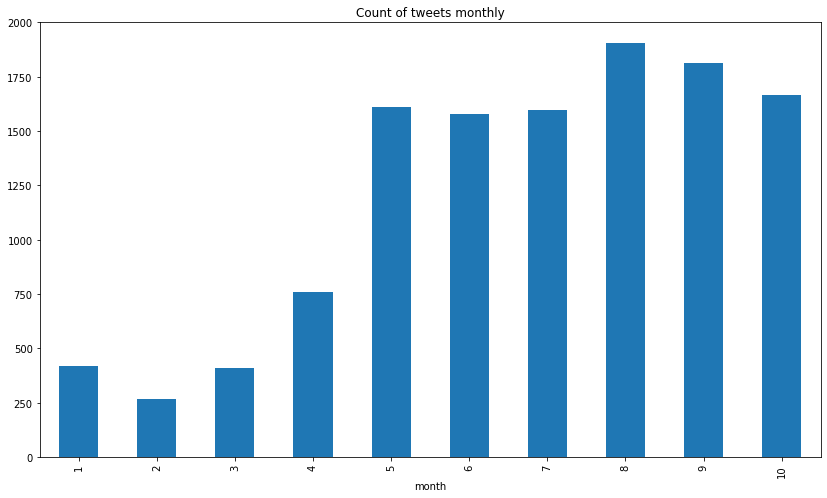

In [243]:
df.groupby(['month'])['clean_tweet'].count().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of tweets monthly")

In [244]:
df["date"].dt.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: date, dtype: int64

In [245]:
df

,date,clean_tweet,month
0,2019-10-21,shared micromobility global phenomenon congrats,10
1,2019-10-21,like standing joke,10
2,2019-10-21,first time bangalore alip drive really enjoyin...,10
3,2019-10-21,helmet also consider put tissue paper wipes he...,10
4,2019-10-20,wow great job,10
...,...,...,...
12015,2019-01-01,already done,1
12016,2019-01-01,harish thank contacting please contact number ...,1
12017,2019-01-01,call please issues kyc person spoke said would...,1
12018,2019-01-01,dear harish apologies delay actually refund co...,1


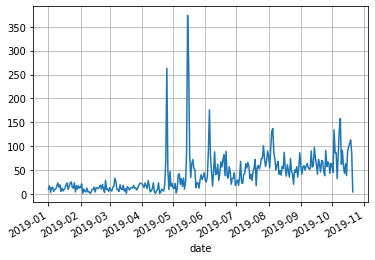

In [246]:
%matplotlib inline
df.groupby(['date'])['clean_tweet'].count().plot(grid = "on")

#### Which period shows the highest growth in tweets.

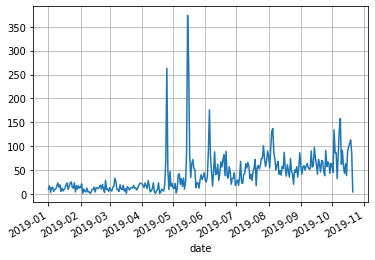

In [247]:
df.groupby(['date'])['clean_tweet'].count().plot(grid = "on")

We can observe that highest growth is between 05-2019 to 06-2019

[]

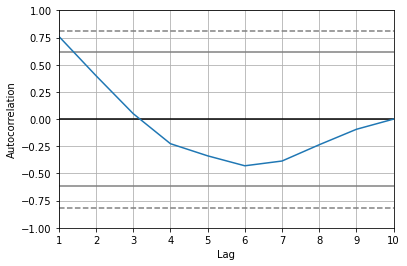

In [315]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.groupby(['month'])['clean_tweet'].count()).plot()


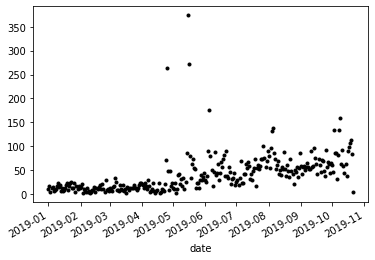

In [321]:
df.groupby(['date'])['clean_tweet'].count().plot(style="k.")


#### Density plot
- It gives clear summary of distribution of tweets with months

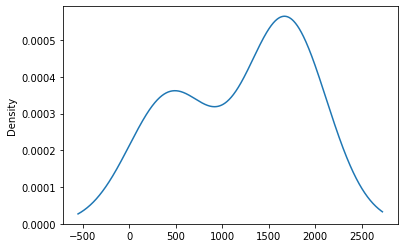

In [317]:
df.groupby(['month'])['clean_tweet'].count().plot(kind='kde')


- Lets check individual counts of tweets in specific months

In [248]:
text = [text for text in data['tweets'][data['date'] == "2019-01-21"]]
text
count = 0
for i in text:
    count = count + 1
print(count)
    

16


In [249]:
text = [text for text in data['tweets'][data['date'] == "2019-05-01"]]
text
count = 0
for i in text:
    count = count + 1
print(count)
    

12


#### Find the most popular bi-grams or tri-grams used in the tweets? 

In [250]:
from nltk import ngrams
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [251]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

In [252]:
print(documentNgrams(data.tweet,1))

            words  count
119            of   2978
42           will   3003
22             we   3069
16             in   3307
77           your   3325
70            our   3358
83           this   3648
3               a   3927
20   @bounceshare   4066
31            you   4456
73             We   4559
91            for   4804
21            and   5461
33             to   8761
89            the   9408


In [253]:
print(documentNgrams(data.tweet,2))

             words  count
85      share your    583
94        get this    649
261     notice. We    667
183    our notice.    774
405         in the    781
178     thanks for    811
179   for bringing    836
180  bringing this    858
816         we are    859
43        will get    931
828         We are    946
282        for the   1017
181        this to   1066
182         to our   1178
222        We will   1538


In [254]:
print(documentNgrams(data.tweet,3))

                      words  count
977     are extremely sorry    392
2723       your concern and    400
980   for the inconvenience    403
662               on a call    416
661                get on a    416
245         notice. We will    470
882           will get this    478
979           sorry for the    545
244          our notice. We    660
164     thanks for bringing    660
208             We will get    750
168          to our notice.    770
165       for bringing this    830
166        bringing this to    840
167             this to our    957


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


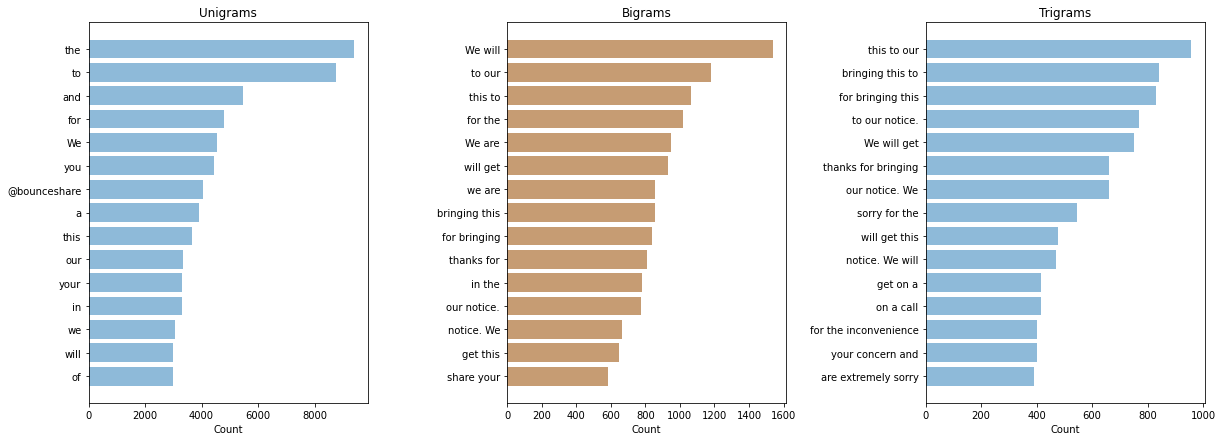

In [255]:
plotNgrams(data.tweet)

###Other Insights from the dataset

#### Count of tweets in a day

In [256]:
df["time"] = [str(item).split("T")[0] for item in df['date'].values]


df["days"] = [str(item).split("-")[2] for item in df['time'].values]
df.days
grouped_tweets = df[['days', 'clean_tweet']].groupby('days')
tweet_growth_days = grouped_tweets.sum()
tweet_growth_days['days']= tweet_growth_days.index
print (tweet_growth_days)


                                            clean_tweet days
days                                                        
01    alternatively please put board stickers known ...   01
02    people country minimal etiquette traffic rules...   02
03    screen shot team join pic twitter com hejwpeof...   03
04    part tweet bounce team file compliant police w...   04
05    dumped near nice industries main road st cross...   05
06    vehicle lies many days think battery detecting...   06
07    hey vinay thanks sharing image made day kind l...   07
08    ans hyderabad join guyshyderabad joinhyderabad...   08
09    though love stolen bounce kms hrs charged rs v...   09
10    hyderabad damn know missed deadlinecommunicati...   10
11    companies like need remember karma endanimesh ...   11
12    looking missing bounce sorry people crazy loca...   12
13    exactly makes dream companyhyderabadknow prope...   13
14    hey sandip thanks ton bringing notice forwarde...   14
15    ohh seen triple ri

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


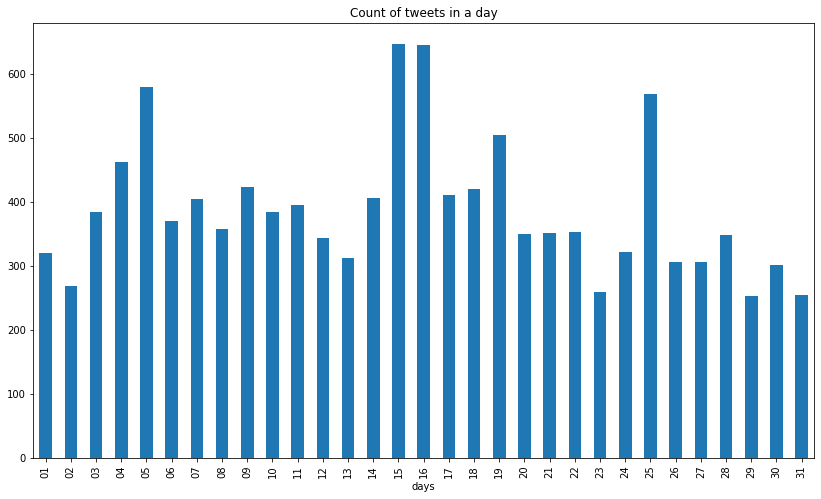

In [257]:
df.groupby(['days'])['clean_tweet'].count().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of tweets in a day")

In [258]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'tweets', 'clean', 'clean_tweet'],
      dtype='object')

### Top 20 Retweets and Top 20 Retweeted

In [259]:
topretweets = data.groupby('id').size().sort_values(ascending=False).reset_index()
topretweets

,id,0
0,1186038116517212160,1
1,1137730095135596544,1
2,1137797832444825600,1
3,1137797348355010561,1
4,1137777337032830976,1
...,...,...
12015,1164082289187229696,1
12016,1164077358044856320,1
12017,1164075969922994177,1
12018,1164074153013592064,1


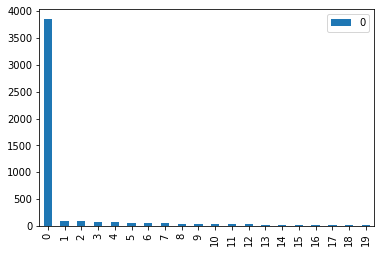

In [260]:
topretweeted = data.groupby('username').size().sort_values(ascending=False).reset_index()
topretweeted[:20].plot(kind = 'bar')

## Optional

### Clustering the tweets based on similar topics

In [261]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'tweets', 'clean', 'clean_tweet'],
      dtype='object')

In [262]:
new = data[["id","clean_tweet"]]
new.head()

,id,clean_tweet
0,1186038116517212160,shared micromobility global phenomenon congrats
1,1186002436344823809,like standing joke
2,1185995725932384256,first time bangalore alip drive really enjoyin...
3,1185987970655899648,helmet also consider put tissue paper wipes he...
4,1185965893819367424,wow great job


- Since our tweets are cleaned so we can directly fit the model

In [263]:
## Using Kmeans

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Considering 3 grams and mimnimum frq as 0
tf_idf_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english', min_df = 0.0001)
tf_idf_vect.fit(new['clean_tweet'])
desc_matrix = tf_idf_vect.transform(new["clean_tweet"])

### Implementing K- means

In [264]:

from sklearn.cluster import KMeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

- Using PCA to reduce the dimensionality

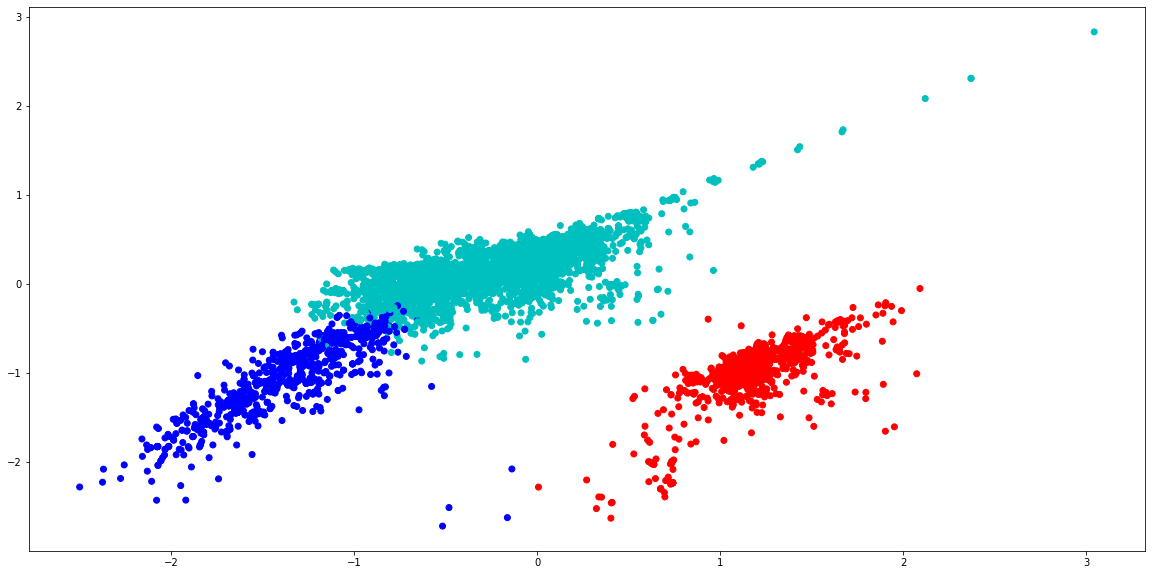

In [265]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(desc_matrix.toarray())

colors = ["r", "b", "c", "y", "m" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in clusters])

for i, txt in enumerate(x):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

In [266]:
new["clusters"] = clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
new.head(25)

,id,clean_tweet,clusters
0,1186038116517212160,shared micromobility global phenomenon congrats,2
1,1186002436344823809,like standing joke,2
2,1185995725932384256,first time bangalore alip drive really enjoyin...,2
3,1185987970655899648,helmet also consider put tissue paper wipes he...,2
4,1185965893819367424,wow great job,2
5,1185962985795121152,pm,2
6,1185954651713216512,congrats vivek team,2
7,1185930478265753601,hey yateesh please accept sincere apologies wo...,2
8,1185928132374626304,hey fueling vehicle still recieved cashback,2
9,1185920793785458688,thumbs pic twitter com sqjkm,0


In [270]:
mappings= {2:"Neutral",0:"Negative",1: "Positive"}

new['clusters'] = new['clusters'].map(mappings)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Transfer Learning
- We will use FastAI library that is focused on using pre-trained Language Models  and then tune them.

In [271]:
!pip install fastai

In [272]:
from fastai.text import *

We’ll create two models.
-  A language model and a text   classification model, therefore we’ll create two different data bunches using the TextLMDataBunch and TextClasDataBunch classes:

In [273]:
# Language model data
train_df, valid_df = new.loc[:6000,:], new.loc[6000:,:]
data_lm = TextLMDataBunch.from_df(path, train_df, valid_df, text_cols=1, bs=32)
data_clas = TextClasDataBunch.from_df(path, train_df, valid_df, text_cols=1, label_cols=2, bs=32)

In [274]:
data_lm.show_batch()

idx,text
0,checked assist xxbos hey xxunk vehicle still xxunk cashback xxbos xxunk pic twitter com xxunk xxbos xxunk xxunk guys really payroll bounce xxbos congratulations entire xxunk wishing xxbos vehicles towed xxbos xxbos hey arun thanks bringing notice please share time took snap forward concerned team retrieve helmet individual earliest xxbos hussain thank much sharing contact number get touch monday xxbos xxunk finally k rides big achievement xxbos xxunk xxunk buy
1,near house helmet kept inside trunk previous customer xxunk rain helmet xxunk helmet prone theft bringing notice already shared details xxbos check xxbos guys xxunk fare let say drive takes minutes much paying scenario minutes much paying xxbos would also request please share feedback first ride wish safe rides welcome family happy bouncing xxbos xxbos using one tomorrow first time let see goes xxbos happy hear however get issue checked
2,xxunk switched roads new ones xxbos start xxunk show continues xxbos luck xxunk xxunk xxunk wind xxunk road today one hand initiatives like operate negative xxunk solve urban commute tax xxunk money gets xxunk pathetic infra roads cave like pic twitter com xxunk xxbos refuel scooter allowed upload recipt recipt uploaded kindly revert paytm xxunk cash back bounce wallet thanks pic twitter com xxunk xxbos appreciate response took snap yesterday
3,yesterday infront xxunk railway station road yesterday xxbos absolutely right bang despite xxunk road tax paying state country painful see pathetic infrastructure lack basic civic facilities open spaces city corruption xxunk state completely spoilt beautiful city xxbos hey sachin per telephonic conversation issue resolved great day ahead xxbos hey abdul tried reaching unfortunately unable connect call please help convenient time alternate number reach xxbos hey xxunk appreciate concern support towards
4,bouncing xxbos question getting charged km friend getting pic twitter com xxunk xxbos real happiness find helmet passing next rider thanks pic twitter com xxunk xxbos xxunk hyderabad xxunk xxbos xxbos place st main road koramangala st block date th oct time around pm pic twitter com xxunk xxbos bikes given time bangalore metro stations also xxunk ppl park bounce vehicles inside home end ride caused roam around kilometres xxbos


In [275]:
data_clas.show_batch()


text,target
xxbos bike sharing started goa traditional business system rider approached bike owner register rental service involved paper work pass bengaluru first app based rental service far know bounce becomes world fastest growing bike sharing start html twitter impression true,Neutral
xxbos story saved tonight riding back home ran fuel midway parked bike safe ish place wanna leave overnight bounce available minute away booked got fuel came back thank guys pic twitter com xxunk,Negative
xxbos worst customer service ever raised issue wrongly imposed parking violation fees july finally several mails got location july surprise private parking location calls direct proper info till end pic twitter com xxunk,Negative
xxbos good one best still long way daily try take bounce end days empty fuel tank non working scooter non availability scooter family society please xxunk bounce zone ecity town ecity phase,Neutral
xxbos excellent sure xxunk recently met person bounce saying ppl replacing parts vehicles major issue parking wherever want another thing high xxunk due high wear xxunk due rough xxunk users xxunk issue,Neutral


- In FastAI, a language model can be created using the language_model_learner method

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


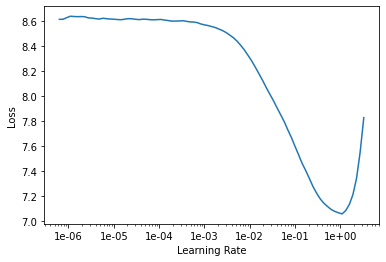

In [281]:
learn = language_model_learner(data_lm,AWD_LSTM, drop_mult=0.5)

learn.lr_find() 
learn.recorder.plot()

In [282]:

learn.fit_one_cycle(1, 1e-2)                  


epoch,train_loss,valid_loss,accuracy,time
0,6.313567,5.432672,0.187608,04:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


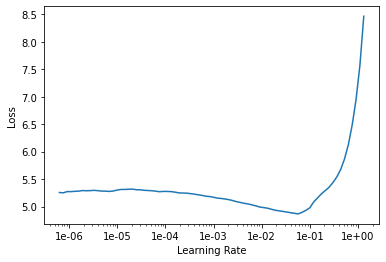

In [283]:
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [284]:

learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.033100,5.176671,0.228166,06:17
1,4.657924,4.904141,0.252665,06:18
2,4.305214,4.718988,0.271970,06:18
3,3.986087,4.666814,0.283212,06:15
4,3.712178,4.655494,0.281778,06:14
5,3.415176,4.689903,0.280235,06:15
6,3.147822,4.759867,0.277557,06:08
7,2.925910,4.816377,0.275095,05:50
8,2.758734,4.847036,0.272524,05:57
9,2.665433,4.854985,0.271239,05:52


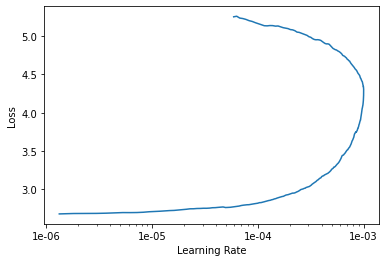

In [285]:
learn.recorder.plot()

 Lets save the encoder to use for our classification model:

In [287]:
learn.save_encoder('ft_enc')

### Classification model

In [288]:
# after the LM is fine-tuned on the target task, we run the text_classifier_learner to start training the classifier
# on the target task (classification of tweets)
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (6001 items)
x: TextList
xxbos shared micromobility global xxunk congrats,xxbos like standing joke,xxbos first time bangalore xxunk drive really enjoying xxunk banglore igshid xxunk,xxbos helmet also consider put xxunk paper xxunk helmet hygiene get maintained xxunk xxunk xxunk ride every one wearing feel comfortable xxunk xxunk xxunk xxunk,xxbos wow great job
y: CategoryList
Neutral,Neutral,Neutral,Neutral,Neutral
Path: /content/drive/My Drive/Dataset;

Valid: LabelList (6020 items)
x: TextList
xxbos talking abt third image wherein vehicles aligned footpath painted wherein xxunk vehicles parked seems drainage cover however shud careful well customers startups making life easy,xxbos akash xxunk xxunk proof provided unless do nt want call footpath footpath xxunk pic twitter com xxunk,xxbos today company folks brought truck vehicles parking pavement near sap office basis special privilege even tow vehicles,xxbos doubtful parked vehicle

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


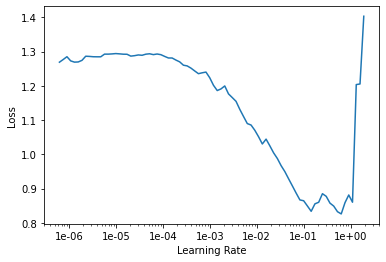

In [289]:
learn.lr_find()
learn.recorder.plot()

For training the model, 
- we’ll first train the  decoder.
- Then we’ll unfreeze one layer after another—this approach was found to give better results for text classification models

In [290]:
learn.fit_one_cycle(1, 1e-2)

# unfreeze one layer group and train another epoch
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.201211,0.298630,0.871595,02:58


epoch,train_loss,valid_loss,accuracy,time
0,0.066477,0.025256,0.992525,03:23


epoch,train_loss,valid_loss,accuracy,time
0,0.070366,0.018730,0.993189,05:33


epoch,train_loss,valid_loss,accuracy,time
0,0.052209,0.019984,0.992857,06:36


With our model trained, we can now make predictions :

In [297]:
learn.predict("I really loved the dress")

(Category tensor(1), tensor(1), tensor([4.4446e-05, 9.9955e-01, 4.0940e-04]))

This is predicted as ‘1’, positive review. 

In [302]:
learn.predict("thanks for the gift")

(Category tensor(1), tensor(1), tensor([6.2516e-05, 9.9977e-01, 1.6370e-04]))